In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.10f}'.format)

In [41]:
df = pd.read_csv("dataset/Students_Grading_Dataset.csv")
df

Student_ID First_Name Last_Name                       Email  Gender  Age  \
0         S1000       Omar  Williams     student0@university.com  Female   22   
1         S1001      Maria     Brown     student1@university.com    Male   18   
2         S1002      Ahmed     Jones     student2@university.com    Male   24   
3         S1003       Omar  Williams     student3@university.com  Female   24   
4         S1004       John     Smith     student4@university.com  Female   23   
...         ...        ...       ...                         ...     ...  ...   
4995      S5995      Ahmed     Jones  student4995@university.com    Male   19   
4996      S5996       Emma     Brown  student4996@university.com    Male   19   
4997      S5997       John     Brown  student4997@university.com  Female   24   
4998      S5998       Sara     Davis  student4998@university.com    Male   23   
4999      S5999      Maria     Brown  student4999@university.com  Female   21   

       Department  Attendance (%)  Midterm_Score   Final_Score  ...  \
0     Mathematics   97.3600000000  40.6100000000 59.6100000000  ...   
1        Business   97.7100000000  57.2700000000 74.0000000000  ...   
2     Engineering   99.5200000000  41.8400000000 63.8500000000  ...   
3     Engineering   90.3800000000  45.6500000000 44.4400000000  ...   
4              CS   59.4100000000  53.1300000000 61.7700000000  ...   
...           ...             ...            ...           ...  ...   
4995           CS   96.0900000000  45.8600000000 45.6300000000  ...   
4996  Mathematics   96.3000000000  78.6700000000 47.4200000000  ...   
4997           CS   89.9400000000  50.8400000000 65.8300000000  ...   
4998  Engineering   99.0900000000  55.4400000000 57.4500000000  ...   
4999  Mathematics   90.3300000000  93.2900000000 88.4200000000  ...   

      Projects_Score   Total_Score  Grade  Study_Hours_per_Week  \
0      62.8400000000 83.4900000000      C         10.3000000000   
1      98.2300000000 92.2900000000      F         27.1000000000   
2      91.2200000000 93.5500000000      F         12.4000000000   
3      55.4800000000 51.0300000000      A         25.5000000000   
4      87.4300000000 90.9100000000      A         13.3000000000   
...              ...           ...    ...                   ...   
4995   51.6600000000 83.6000000000      A          7.8000000000   
4996   52.3300000000 50.6000000000      C         24.2000000000   
4997   97.8900000000 90.3200000000      D          7.6000000000   
4998   84.7400000000 77.3500000000      A         14.5000000000   
4999   66.2300000000 78.3200000000      D         29.9000000000   

      Extracurricular_Activities Internet_Access_at_Home  \
0                            Yes                      No   
1                             No                      No   
2                            Yes                      No   
3                             No                     Yes   
4                            Yes                      No   
...                          ...                     ...   
4995                          No                      No   
4996                          No                     Yes   
4997                          No                     Yes   
4998                         Yes                      No   
4999                         Yes                     Yes   

      Parent_Education_Level Family_Income_Level Stress_Level (1-10)  \
0                   Master's              Medium                   1   
1                High School                 Low                   4   
2                High School                 Low                   9   
3                High School                 Low                   8   
4                   Master's              Medium                   6   
...                      ...                 ...                 ...   
4995                Master's              Medium                  10   
4996                     NaN              Medium                   4   
4997 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

# Preprocesamiento

In [43]:
df["Department"].unique()

array(['Mathematics', 'Business', 'Engineering', 'CS'], dtype=object)

In [44]:
df["Grade"].unique()

array(['C', 'F', 'A', 'D', 'B'], dtype=object)

In [45]:
df["Family_Income_Level"].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [46]:
df["Parent_Education_Level"].unique()

array(["Master's", 'High School', nan, "Bachelor's", 'PhD'], dtype=object)

In [47]:
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna('Unknown')
df['Internet_Access_at_Home'] = df['Internet_Access_at_Home'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Department'] = df['Department'].map({'Mathematics': 0, 'Business': 1, 'Engineering': 2, 'CS': 3})
df['Grade'] = df['Grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4, })
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
df['Family_Income_Level'] = df['Family_Income_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Parent_Education_Level'] = df['Parent_Education_Level'].map({'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'PhD': 3, 'Unknown': 4})
df['Stress_Level (1-10)'] = pd.to_numeric(df['Stress_Level (1-10)'], errors='coerce')
df['Stress_Level (1-10)'] = df['Stress_Level (1-10)'].astype('Int64')
df['Stress_Level (1-10)'] = df['Stress_Level (1-10)'].map({
    1: "Bajo", 2: "Bajo", 3: "Bajo",
    4: "Medio", 5: "Medio", 6: "Medio", 7: "Medio",
    8: "Alto", 9: "Alto", 10: "Alto"
})

In [48]:
df['Stress_Level (1-10)']

0        Bajo
1       Medio
2        Alto
3        Alto
4       Medio
        ...  
4995     Alto
4996    Medio
4997    Medio
4998     Alto
4999     Bajo
Name: Stress_Level (1-10), Length: 5000, dtype: object

KeyboardInterrupt: 

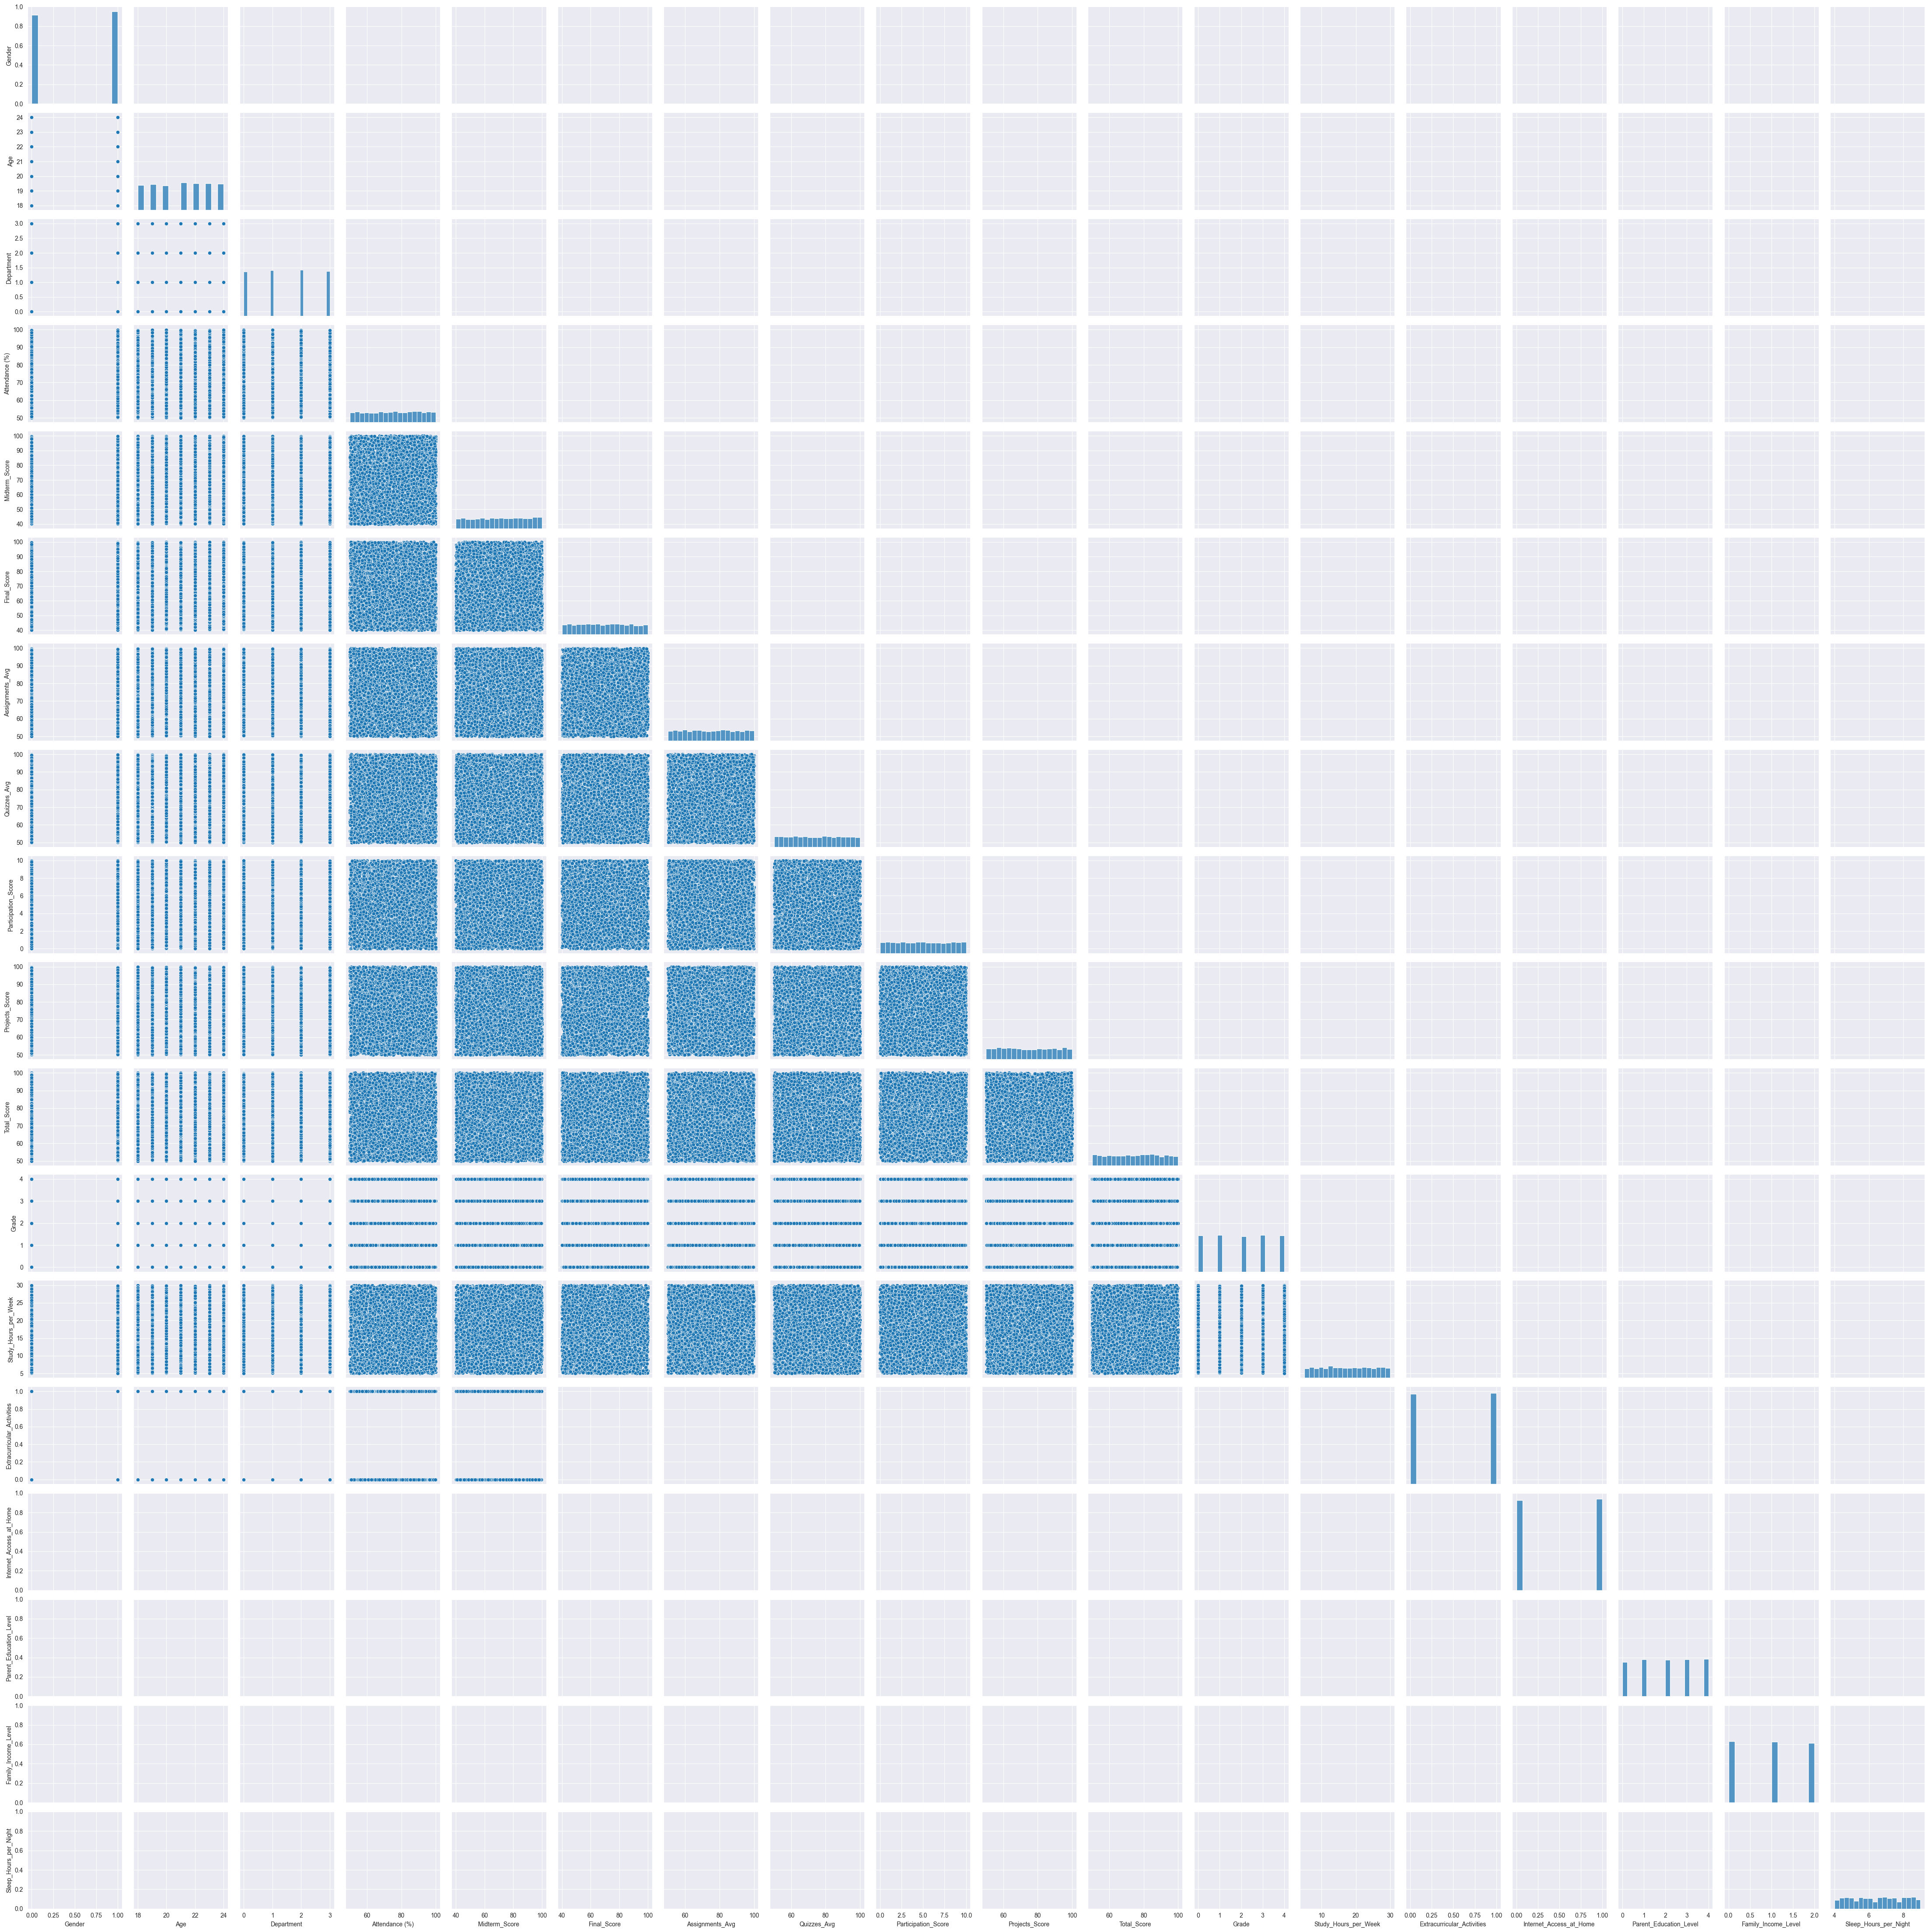

In [49]:
sns.pairplot(df)

<Axes: >

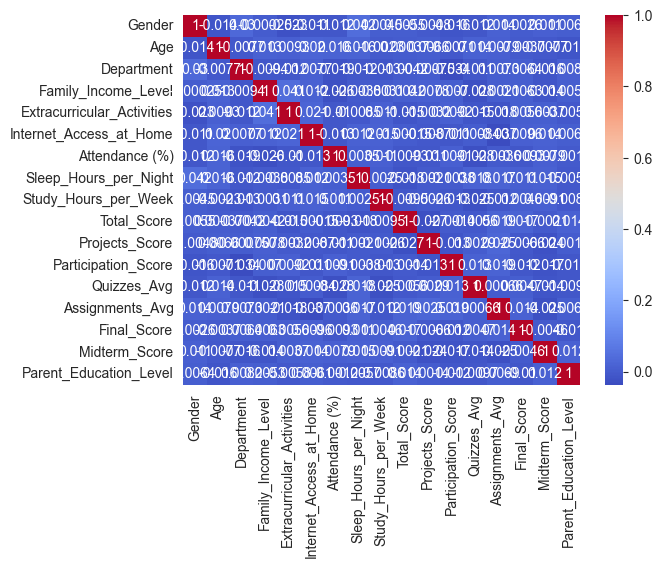

In [50]:
sns.heatmap(df[["Gender",
        "Age",
        "Department",
        "Family_Income_Level",
        "Extracurricular_Activities",
        "Internet_Access_at_Home",
        "Attendance (%)",
        "Sleep_Hours_per_Night",
        "Study_Hours_per_Week",
        "Total_Score",
        "Projects_Score",
        "Participation_Score",
        "Quizzes_Avg",
        "Assignments_Avg",
        "Final_Score",
        "Midterm_Score",
        "Parent_Education_Level"]].corr()
            , annot=True, cmap="coolwarm")

In [51]:
df.isnull().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [52]:
matrix = df[["Gender",
        "Age",
        "Department",
        "Family_Income_Level",
        "Extracurricular_Activities",
        "Internet_Access_at_Home",
        "Attendance (%)",
        "Sleep_Hours_per_Night",
        "Study_Hours_per_Week",
        "Total_Score",
        "Projects_Score",
        "Participation_Score",
        "Quizzes_Avg",
        "Assignments_Avg",
        "Final_Score",
        "Midterm_Score",
        "Parent_Education_Level"]].corr()

matrix

Gender           Age    Department  \
Gender                      1.0000000000 -0.0137682127  0.0297773159   
Age                        -0.0137682127  1.0000000000 -0.0077259304   
Department                  0.0297773159 -0.0077259304  1.0000000000   
Family_Income_Level        -0.0002503889  0.0126123230 -0.0094284234   
Extracurricular_Activities -0.0229029499  0.0093325356 -0.0117242488   
Internet_Access_at_Home    -0.0109658328  0.0197096432  0.0076978677   
Attendance (%)             -0.0123653367  0.0159362516 -0.0185853434   
Sleep_Hours_per_Night       0.0421148460  0.0155101261 -0.0119203064   
Study_Hours_per_Week        0.0045375563 -0.0023133320 -0.0130544617   
Total_Score                 0.0055184702  0.0003748084 -0.0042149729   
Projects_Score             -0.0048017927  0.0066276116 -0.0007507573   
Participation_Score        -0.0159946942 -0.0071317882 -0.0343142304   
Quizzes_Avg                -0.0115558707  0.0139976433 -0.0109276830   
Assignments_Avg             0.0138370245  0.0079023702  0.0072825588   
Final_Score                 0.0025544342 -0.0037000677  0.0063774019   
Midterm_Score               0.0105550599 -0.0077095264 -0.0157512115   
Parent_Education_Level      0.0063717013 -0.0161137653  0.0081987857   

                            Family_Income_Level  Extracurricular_Activities  \
Gender                            -0.0002503889               -0.0229029499   
Age                                0.0126123230                0.0093325356   
Department                        -0.0094284234               -0.0117242488   
Family_Income_Level                1.0000000000                0.0407661234   
Extracurricular_Activities         0.0407661234                1.0000000000   
Internet_Access_at_Home            0.0118658712                0.0207625036   
Attendance (%)                    -0.0260344156               -0.0100868630   
Sleep_Hours_per_Night             -0.0037663343               -0.0085264657   
Study_Hours_per_Week              -0.0030648119                0.0112897531   
Total_Score                        0.0041840513               -0.0145827433   
Projects_Score                     0.0078498272               -0.0031817104   
Participation_Score                0.0070021855                0.0091771573   
Quizzes_Avg                       -0.0277073996               -0.0145100791   
Assignments_Avg                    0.0021466387               -0.0176346568   
Final_Score                        0.0062692648                0.0056199251   
Midterm_Score                     -0.0136258994                0.0037265888   
Parent_Education_Level             0.0053154012               -0.0057921026   

                            Internet_Access_at_Home  Attendance (%)  \
Gender                                -0.0109658328   -0.0123653367   
Age                                    0.0197096432    0.0159362516   
Department                             0.0076978677   -0.0185853434   
Family_Income_Level                    0.0118658712   -0.0260344156   
Extracurricular_Activities             0.0207625036   -0.0100868630   
Internet_Access_at_Home                1.0000000000   -0.0127075911   
Attendance (%)                        -0.0127075911    1.0000000000   
Sleep_Hours_per_Night                  0.0117739021    0.0034934651   
Study_Hours_per_Week                   0.0152516104    0.0111999231   
Total_Score                           -0.0001468353   -0.0092831457   
Projects_Score                        -0.0086524061   -0.0111010955   
Participation_Score                   -0.0109635762    0.0090507893   
Quizzes_Avg                            0.0008437343   -0.0278402196   
Assignments_Avg                       -0.0372515055   -0.0035995675   
Final_Score                            0.0095728123   -0.0093003135   
Midterm_Score                          0.0136111217    0.0078807865   
Parent_Education_Level                 0.0060769653   -0.0011694930   

                            Sleep_H

In [53]:
df

Student_ID First_Name Last_Name                       Email  Gender  Age  \
0         S1000       Omar  Williams     student0@university.com       0   22   
1         S1001      Maria     Brown     student1@university.com       1   18   
2         S1002      Ahmed     Jones     student2@university.com       1   24   
3         S1003       Omar  Williams     student3@university.com       0   24   
4         S1004       John     Smith     student4@university.com       0   23   
...         ...        ...       ...                         ...     ...  ...   
4995      S5995      Ahmed     Jones  student4995@university.com       1   19   
4996      S5996       Emma     Brown  student4996@university.com       1   19   
4997      S5997       John     Brown  student4997@university.com       0   24   
4998      S5998       Sara     Davis  student4998@university.com       1   23   
4999      S5999      Maria     Brown  student4999@university.com       0   21   

      Department  Attendance (%)  Midterm_Score   Final_Score  ...  \
0              0   97.3600000000  40.6100000000 59.6100000000  ...   
1              1   97.7100000000  57.2700000000 74.0000000000  ...   
2              2   99.5200000000  41.8400000000 63.8500000000  ...   
3              2   90.3800000000  45.6500000000 44.4400000000  ...   
4              3   59.4100000000  53.1300000000 61.7700000000  ...   
...          ...             ...            ...           ...  ...   
4995           3   96.0900000000  45.8600000000 45.6300000000  ...   
4996           0   96.3000000000  78.6700000000 47.4200000000  ...   
4997           3   89.9400000000  50.8400000000 65.8300000000  ...   
4998           2   99.0900000000  55.4400000000 57.4500000000  ...   
4999           0   90.3300000000  93.2900000000 88.4200000000  ...   

      Projects_Score   Total_Score  Grade  Study_Hours_per_Week  \
0      62.8400000000 83.4900000000      2         10.3000000000   
1      98.2300000000 92.2900000000      4         27.1000000000   
2      91.2200000000 93.5500000000      4         12.4000000000   
3      55.4800000000 51.0300000000      0         25.5000000000   
4      87.4300000000 90.9100000000      0         13.3000000000   
...              ...           ...    ...                   ...   
4995   51.6600000000 83.6000000000      0          7.8000000000   
4996   52.3300000000 50.6000000000      2         24.2000000000   
4997   97.8900000000 90.3200000000      3          7.6000000000   
4998   84.7400000000 77.3500000000      0         14.5000000000   
4999   66.2300000000 78.3200000000      3         29.9000000000   

      Extracurricular_Activities  Internet_Access_at_Home  \
0                              1                        0   
1                              0                        0   
2                              1                        0   
3                              0                        1   
4                              1                        0   
...                          ...                      ...   
4995                           0                        0   
4996                           0                        1   
4997                           0                        1   
4998                           1                        0   
4999                           1                        1   

      Parent_Education_Level  Family_Income_Level  Stress_Level (1-10)  \
0                          2                    1                 Bajo   
1                          0                    0                Medio   
2                          0                    0                 Alto   
3                          0                    0                 Alto   
4                          2                    1                Medio   
...                      ...                  ...                  ...   
4995                       2                    1                 Alto   
4996                       4                    1            

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

df["Stress_Gap"] = df["Final_Score"] - df["Midterm_Score"]
df["Performance_Avg"] = df[["Final_Score", "Midterm_Score", "Quizzes_Avg", "Assignments_Avg"]].mean(axis=1)
df["Sleep_Study_Ratio"] = df["Sleep_Hours_per_Night"] / (df["Study_Hours_per_Week"] + 1)

X = df[[
    "Age",
    "Family_Income_Level",
    "Attendance (%)",
    "Sleep_Hours_per_Night",
    "Study_Hours_per_Week",
    "Parent_Education_Level",
    "Final_Score",
    "Midterm_Score",
    "Quizzes_Avg",
    "Assignments_Avg",
    "Stress_Gap",
    "Performance_Avg",
    "Sleep_Study_Ratio"
]]

y = df["Stress_Level (1-10)"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
y_pred = model_rf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Alto       0.29      0.23      0.25       435
        Bajo       0.26      0.14      0.18       470
       Medio       0.38      0.58      0.46       595

    accuracy                           0.34      1500
   macro avg       0.31      0.32      0.30      1500
weighted avg       0.32      0.34      0.31      1500



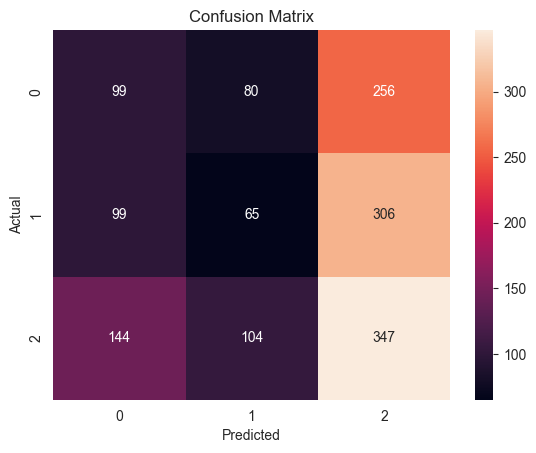

In [59]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [60]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
y_pred = dt_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Alto       0.29      0.31      0.30       435
        Bajo       0.31      0.30      0.30       470
       Medio       0.38      0.37      0.38       595

    accuracy                           0.33      1500
   macro avg       0.33      0.33      0.33      1500
weighted avg       0.33      0.33      0.33      1500



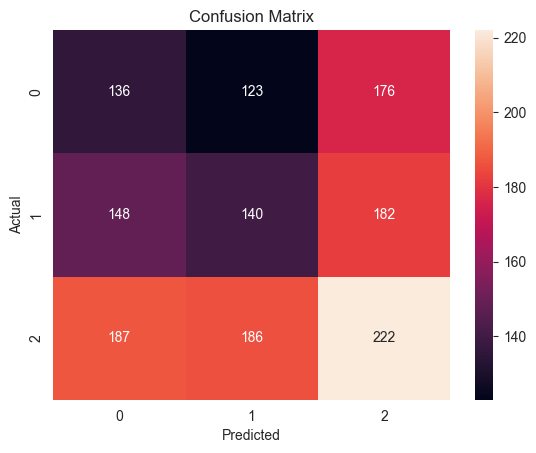

In [62]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
importancias = dt_model.feature_importances_
features = X_train.columns
importancia_df = pd.DataFrame({'Variable': features, 'Importancia': importancias})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Mostrar
print(importancia_df)

                  Variable  Importancia
2           Attendance (%) 0.1116362392
9          Assignments_Avg 0.1104644589
6              Final_Score 0.0971775210
12       Sleep_Study_Ratio 0.0959067093
8              Quizzes_Avg 0.0940472282
11         Performance_Avg 0.0890172955
3    Sleep_Hours_per_Night 0.0812315002
4     Study_Hours_per_Week 0.0780084736
10              Stress_Gap 0.0699032500
7            Midterm_Score 0.0674175864
0                      Age 0.0565153169
5   Parent_Education_Level 0.0264179568
1      Family_Income_Level 0.0222564642


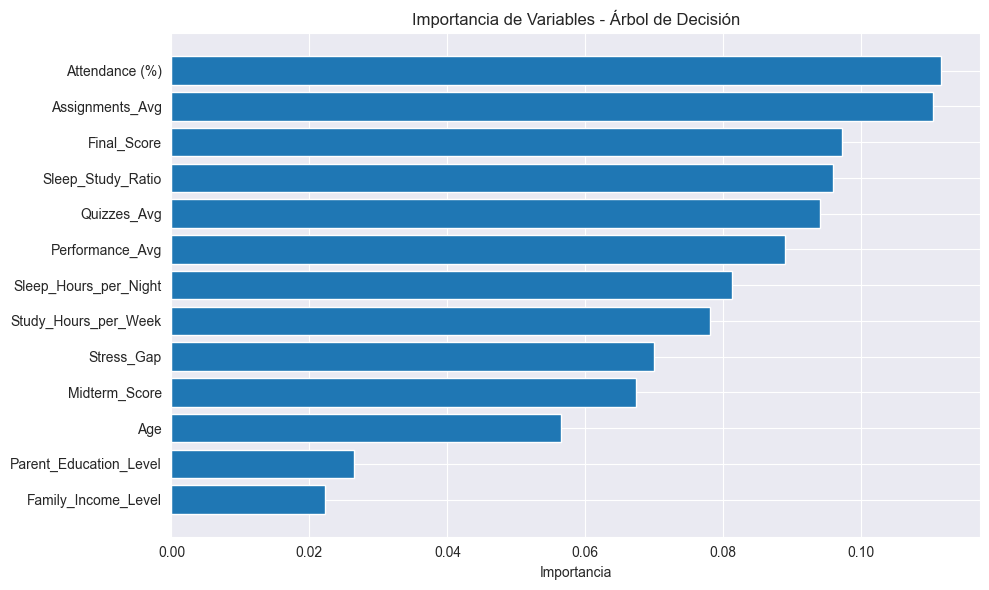

In [67]:
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Variable'], importancia_df['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de Variables - Árbol de Decisión')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [63]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

GaussianNB()

In [64]:
y_pred = nb_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Alto       0.29      0.19      0.23       435
        Bajo       0.30      0.04      0.06       470
       Medio       0.39      0.76      0.52       595

    accuracy                           0.37      1500
   macro avg       0.33      0.33      0.27      1500
weighted avg       0.33      0.37      0.29      1500



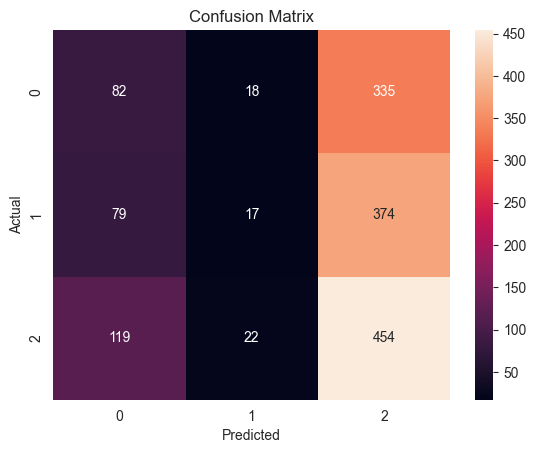

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()